В результате выполнения лабораторной работы мной была реализована параллельная версия алгоритма обхода графа в ширину. Далее в отчёте представлены графики зависимости времени работы последовательной и параллельной версии алгоритма от количества вершин и количества рёбер графа. Для параллельной версии алгоритма рассмотрены разные реализации, использующие отличающиеся подходы к формированию очереди вершин следующего уровня, а также задействующие разное количество потоков.

In [2]:
import matplotlib.pyplot as plt

В графиках далее показана реализация параллельного алгоритма, в которой каждый новый поток, обрабатывающий вершины текущего уровня, сразу добавляет соседнюю вершину в конкурентную очередь, формирующую следующий уровень.

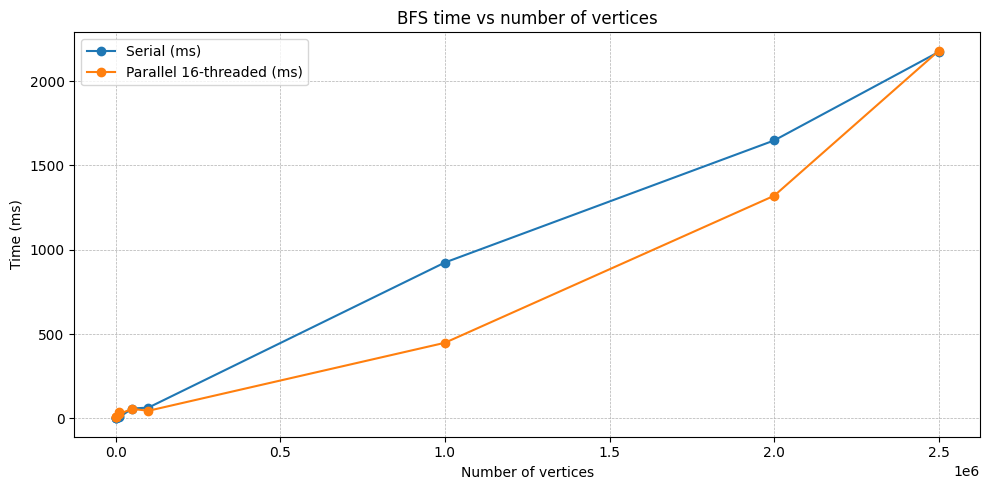

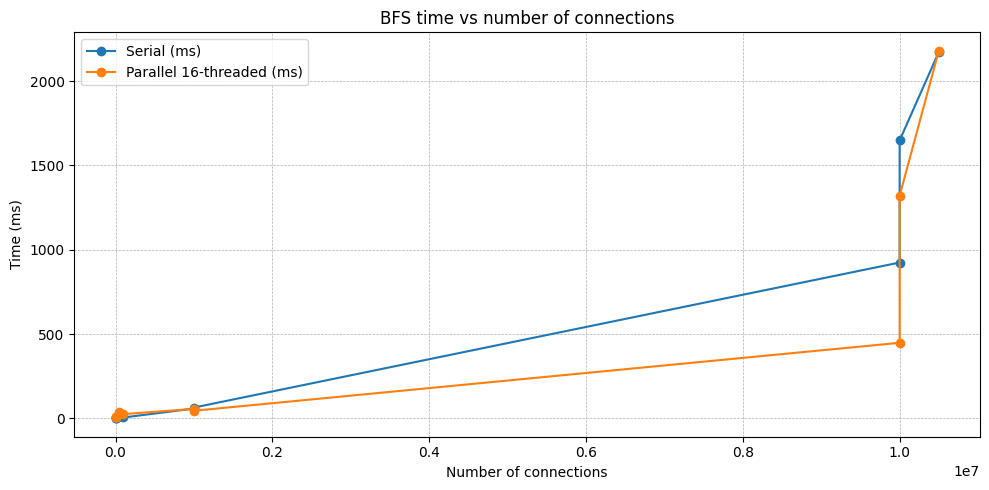

In [6]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 1, 1, 11, 5, 58, 64, 924, 1648, 2173]
parallel_ms = [6, 5, 10, 38, 25, 56, 45, 448, 1320, 2180]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 16-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 16-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

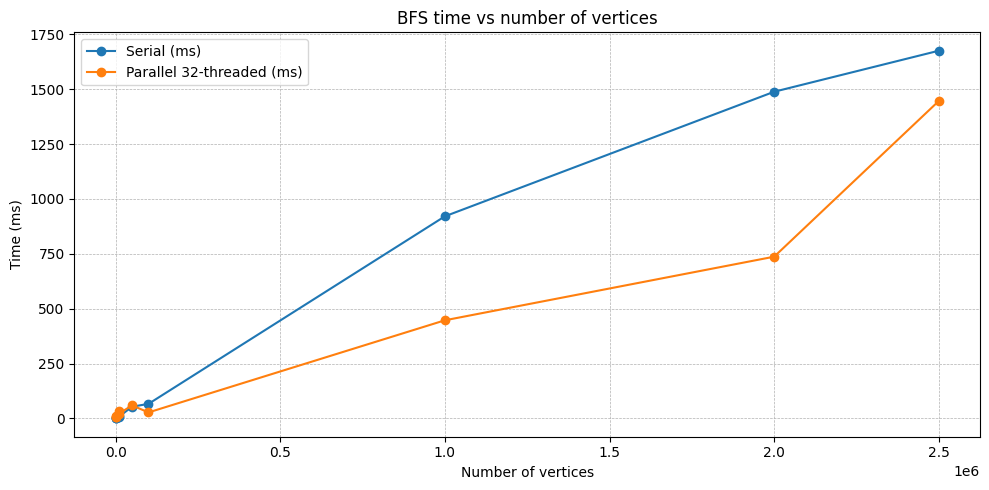

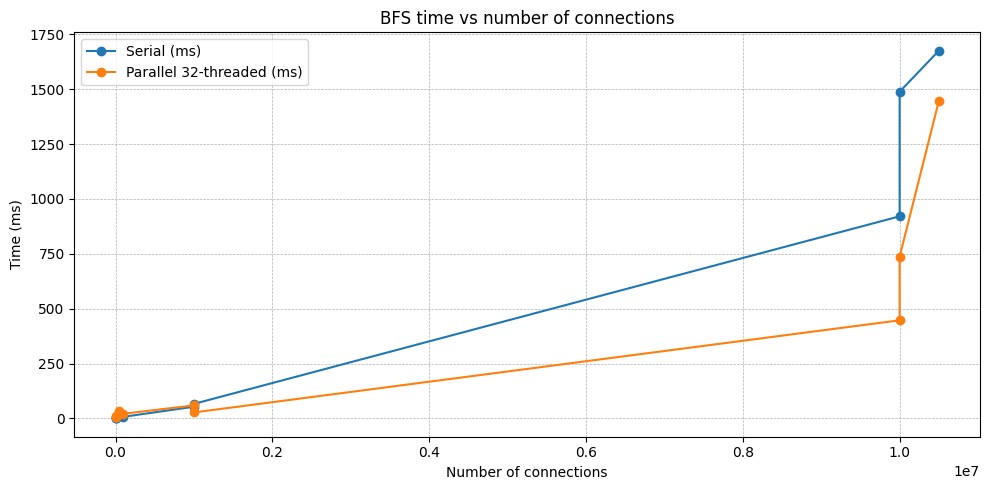

In [7]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 10, 7, 53, 66, 921, 1489, 1676]
parallel_ms = [8, 7, 9, 32, 21, 59, 27, 447, 737, 1447]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 32-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 32-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

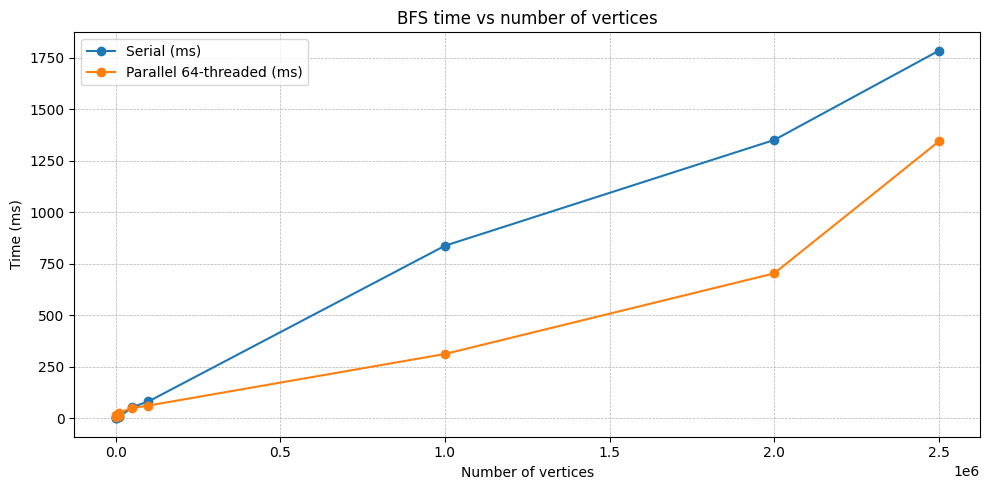

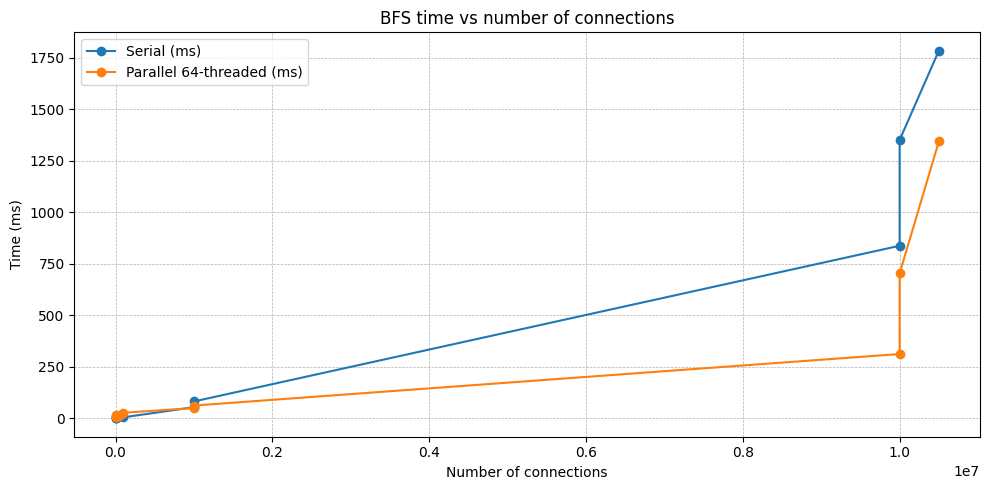

In [8]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 12, 5, 54, 82, 837, 1350, 1783]
parallel_ms = [5, 11, 16, 12, 27, 50, 62, 312, 703, 1343]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 64-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 64-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

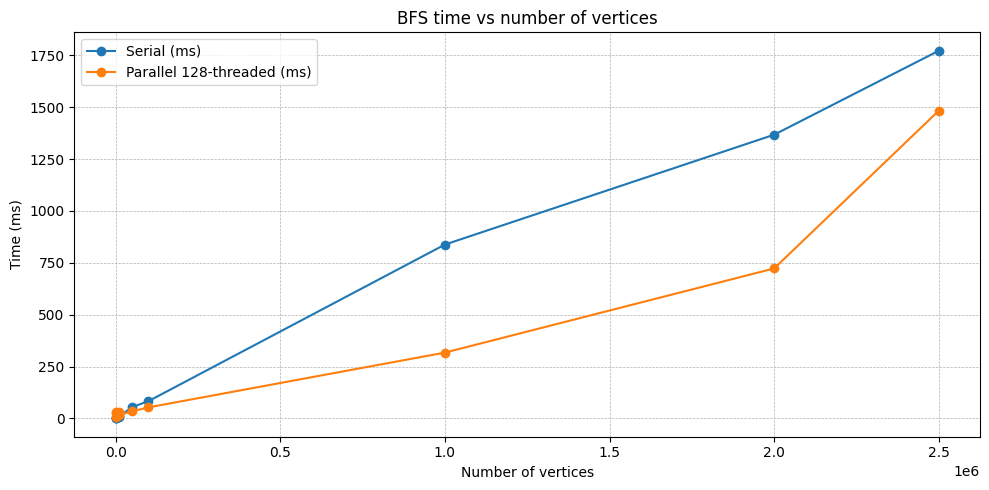

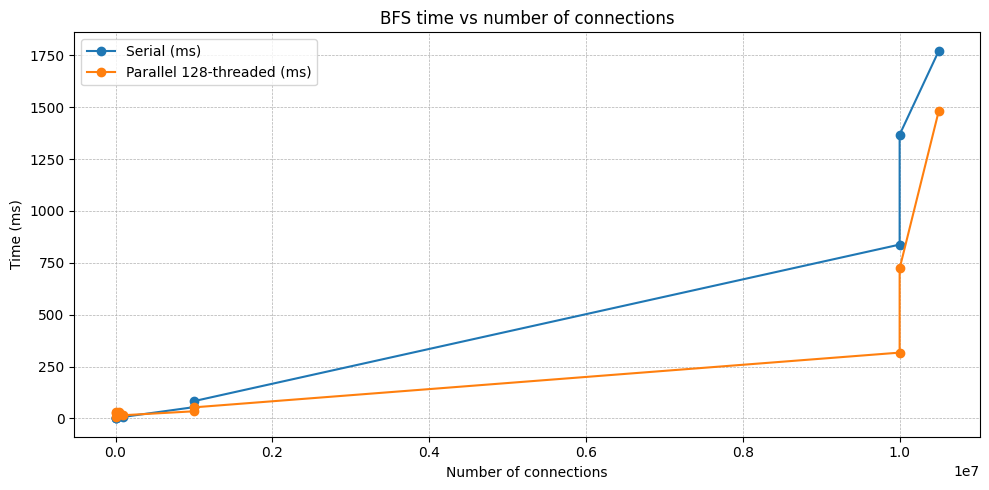

In [9]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 9, 7, 54, 83, 838, 1368, 1773]
parallel_ms = [6, 28, 29, 30, 15, 34, 53, 317, 723, 1484]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 128-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 128-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Теперь рассмотрим реализацию параллельного алгоритма, в которой каждый новый поток, обрабатывающий вершины текущего уровня, локально формирует свой список следующего уровня, а затем все такие списки сливаются в одну общую конкурентную очередь. Ожидается, что такой подход должен быть быстрее, так как мы кратно уменьшаем количество конкурентных операций при добавлении новых вершин.

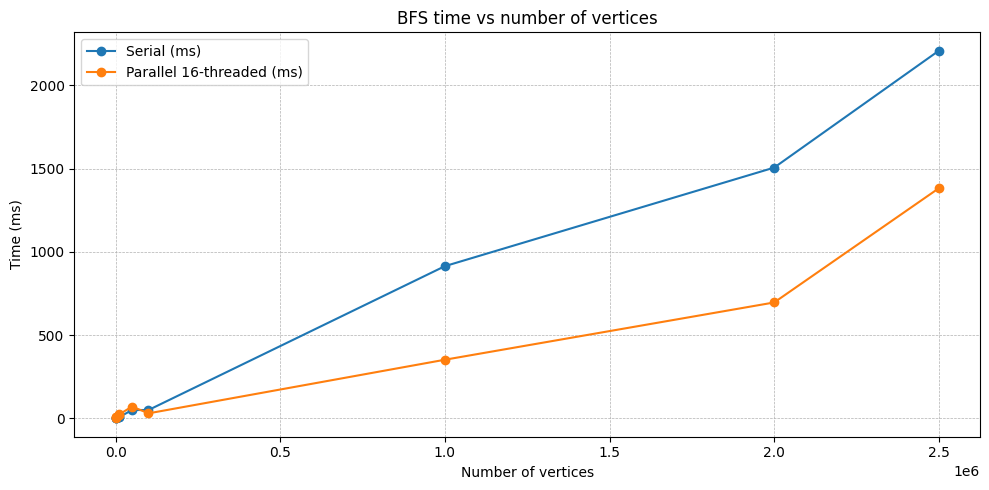

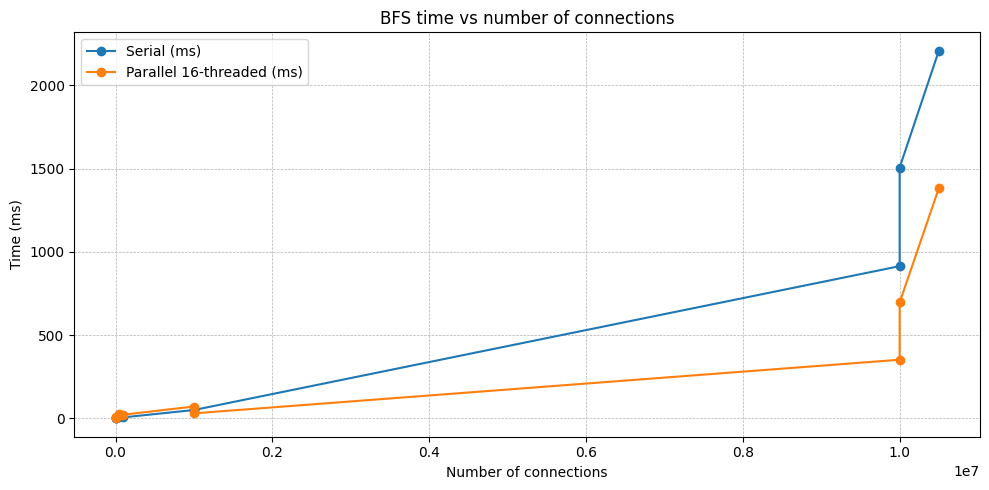

In [10]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 10, 6, 50, 50, 914, 1506, 2208]
parallel_ms = [6, 4, 6, 28, 22, 71, 30, 352, 696, 1382]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 16-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 16-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

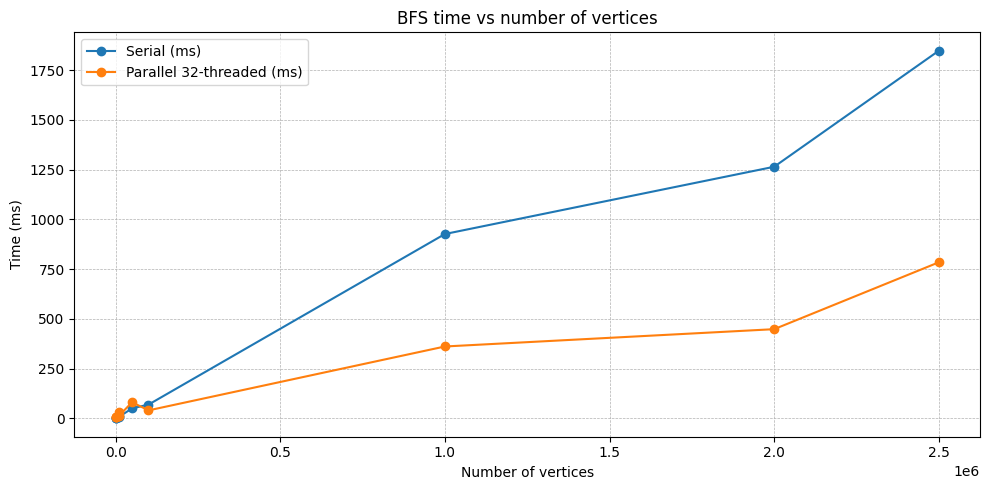

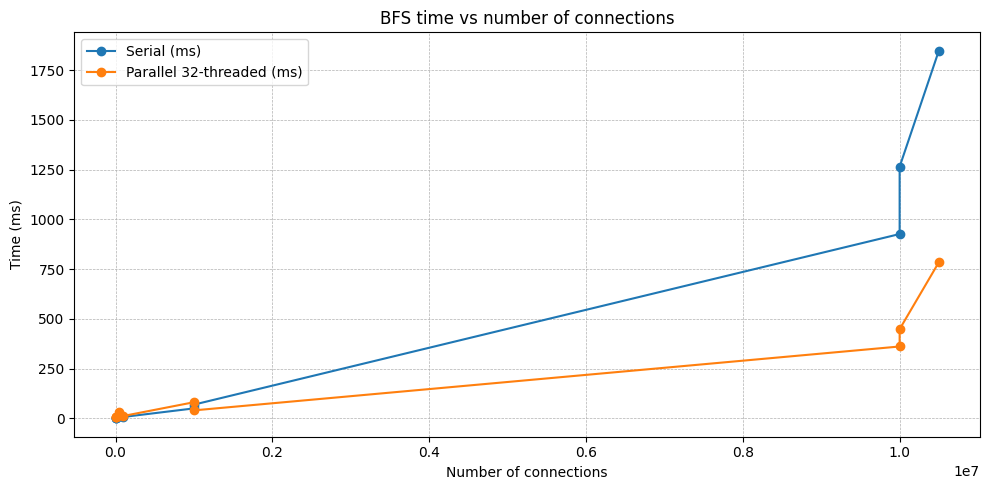

In [11]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 11, 7, 50, 69, 926, 1264, 1847]
parallel_ms = [6, 7, 7, 34, 12, 81, 40, 361, 448, 784]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 32-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 32-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

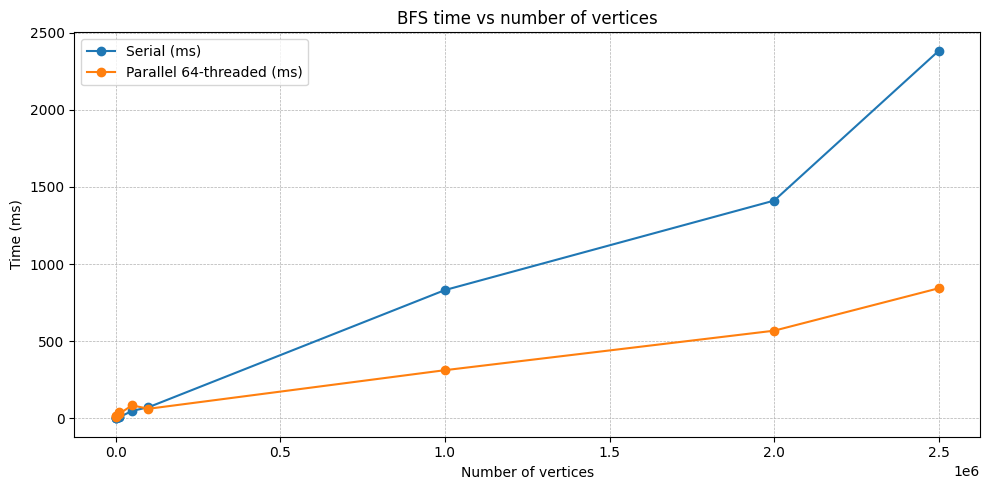

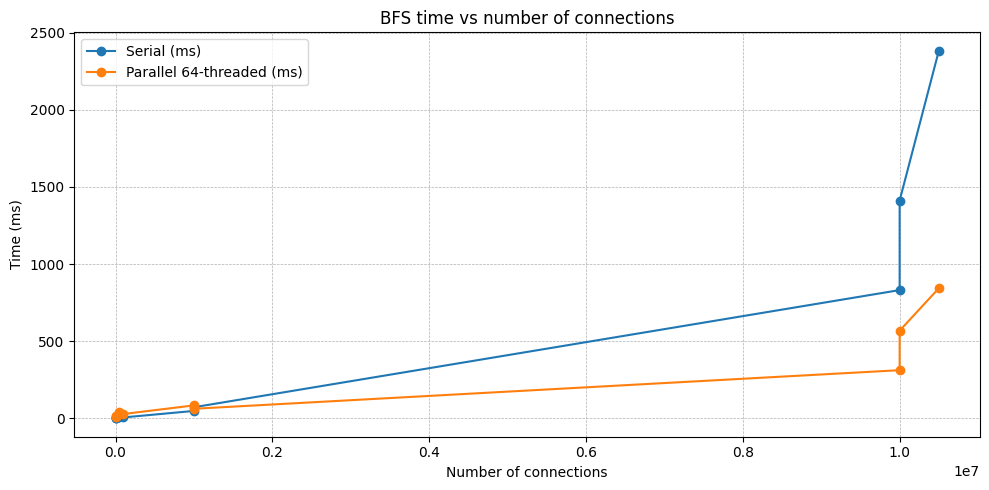

In [12]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 0, 1, 11, 6, 48, 72, 831, 1411, 2382]
parallel_ms = [6, 14, 17, 42, 28, 84, 62, 312, 568, 843]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 64-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 64-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

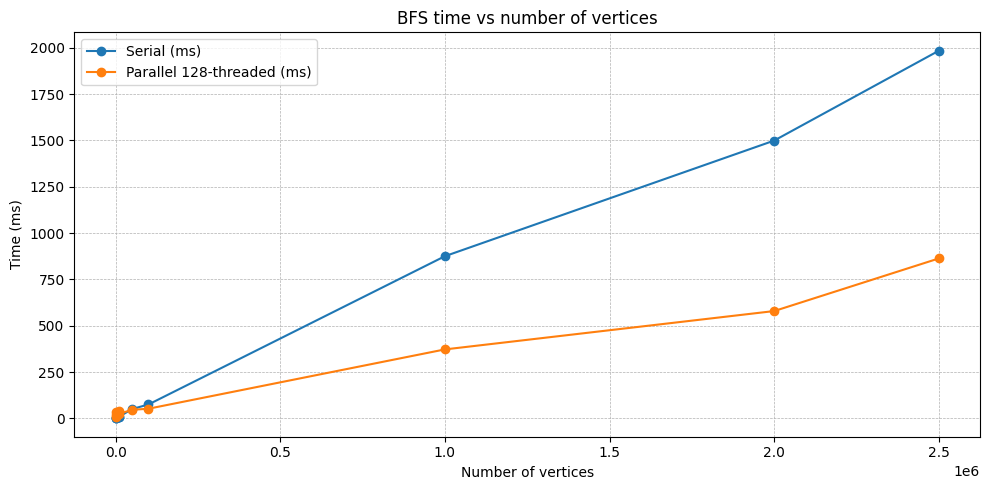

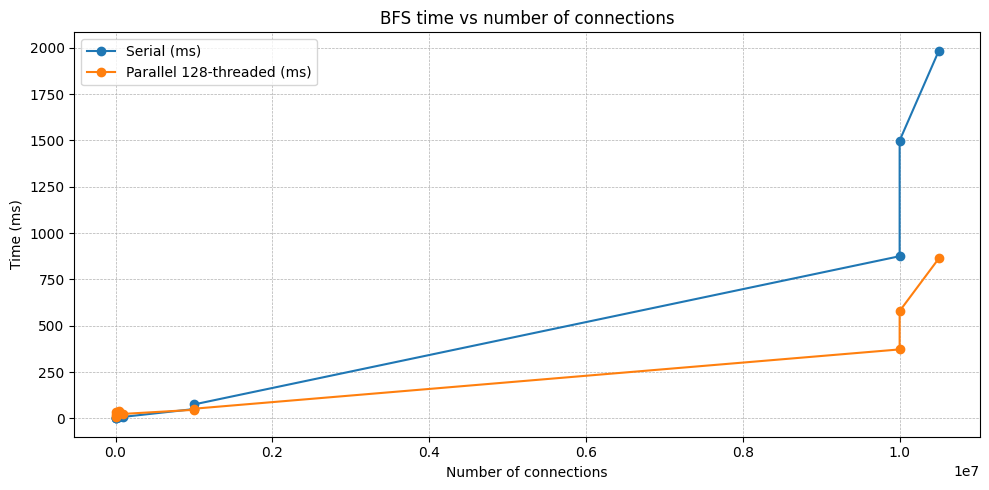

In [13]:
vertices = [10, 100, 1000, 10000, 10000, 50000, 100000, 1000000, 2000000, 2500000]
connections = [50, 500, 5000, 50000, 100000, 1000000, 1000000, 10000000, 10000000, 10500000]
serial_ms = [0, 1, 1, 9, 8, 50, 75, 875, 1499, 1984]
parallel_ms = [6, 19, 32, 42, 24, 46, 52, 372, 579, 863]

plt.figure(figsize=(10,5))
plt.plot(vertices, serial_ms, marker='o', label='Serial (ms)')
plt.plot(vertices, parallel_ms, marker='o', label='Parallel 128-threaded (ms)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of vertices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(connections, serial_ms, marker='o', label='Serial (ms)')
plt.plot(connections, parallel_ms, marker='o', label='Parallel 128-threaded (ms)')
plt.xlabel('Number of connections')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of connections')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Теперь взглянем на график зависимости времени исполнения от количества потоков, использующихся в параллельной версии алгоритма.

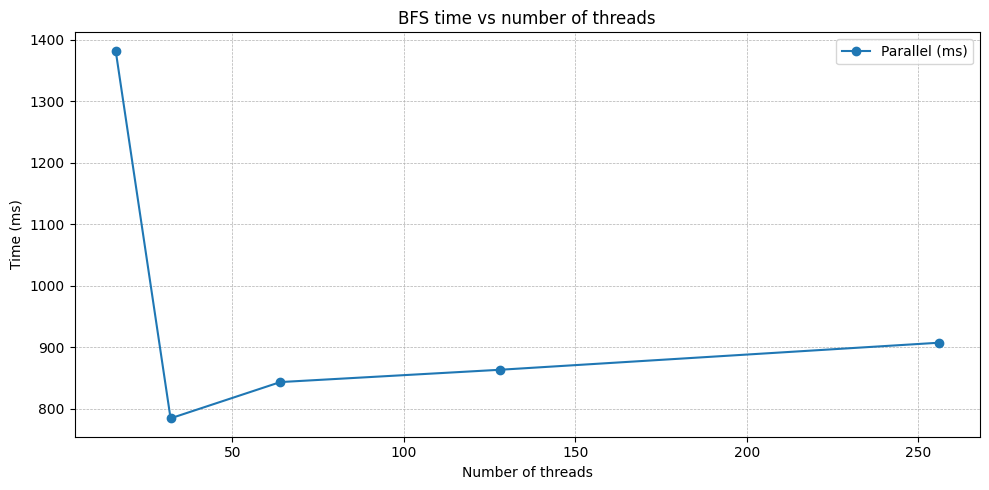

In [3]:
threads = [16, 32, 64, 128, 256]
parallel_ms = [1382, 784, 843, 863, 907]

plt.figure(figsize=(10,5))
plt.plot(threads, parallel_ms, marker='o', label='Parallel (ms)')
plt.xlabel('Number of threads')
plt.ylabel('Time (ms)')
plt.title('BFS time vs number of threads')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Как и ожидалось, при росте количества данных, параллельная версия алгоритма показывает лучший результат. При этом, как видно из графиков, быстрее оказалась вторая реализация параллельного алгоритма, что также было ожидаемо. Наблюдаемая тенденция - чем больше данных, чем больше выигрыш от параллельной версии алгоритма с большими ресурсами.